## Exercise 9 - Image classification with Tensorflow
- In this exercise you utilize CIFAR-100 dataset with Tensorflow for image classification.
- Use [this example](https://hantt.pages.labranet.jamk.fi/ttc2050-material/material/09-ai-image-classification-tensorflow/) as a reference.
- Check the dataset description [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [1]:
from keras.datasets import cifar100
import ssl
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")

2 Do the following changes compared to Cifar-10 example:

- Change the loss parameter for the models compile method to be *sparse_categorical_crossentropy*.
- Remove the binary conversion of labels (to_categorical function lines) and use y_train as the input for the model.
- The last layer neutron count must be 100 instead of 10 (10 was used in the example).
- List called *list_index* inside the predict_image function should contain integers from 0 to 99.
- Create a list called *classification* and add classes as elements to this list (100 classes). The list of classes can be found from the dataset description link above. **Important**: These classes should be in the list alphabetically!

Now run the whole notebook and present the model accuracy and model loss visualizations here as a screenshot.

In [2]:
#Create the models architecture
model = Sequential()

#Add the first layer (Convolution layer for extracting the features from the input image)
model.add( Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)) )

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation="relu") )

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation="relu"))

#Add a drop out layer with 50 % dropout rate
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation="relu"))

#Add a drop out layer with 50 % dropout rate
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation="relu"))

#Add a layer with 10 neurons and convert data into the probabilities
model.add(Dense(100, activation="softmax"))

In [3]:
#Compile the model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [4]:
#Train the model
hist = model.fit(x_train, y_train, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 15s 95ms/step - loss: 5.2677 - accuracy: 0.0094 - val_loss: 4.6058 - val_accuracy: 0.0079
Epoch 2/10
157/157 [==============================] - 14s 92ms/step - loss: 4.6051 - accuracy: 0.0104 - val_loss: 4.6058 - val_accuracy: 0.0083
Epoch 3/10
157/157 [==============================] - 14s 92ms/step - loss: 4.6022 - accuracy: 0.0110 - val_loss: 4.5996 - val_accuracy: 0.0096
Epoch 4/10
157/157 [==============================] - 14s 92ms/step - loss: 4.5999 - accuracy: 0.0116 - val_loss: 4.5951 - val_accuracy: 0.0115
Epoch 5/10
157/157 [==============================] - 14s 91ms/step - loss: 4.5963 - accuracy: 0.0137 - val_loss: 4.6031 - val_accuracy: 0.0089
Epoch 6/10
157/157 [==============================] - 15s 92ms/step - loss: 4.5916 - accuracy: 0.0136 - val_loss: 4.6007 - val_accuracy: 0.0101
Epoch 7/10
157/157 [==============================] - 14s 92ms/step - loss: 4.5517 - accuracy: 0.0192 - val_loss: 4.4778 - val_accuracy:

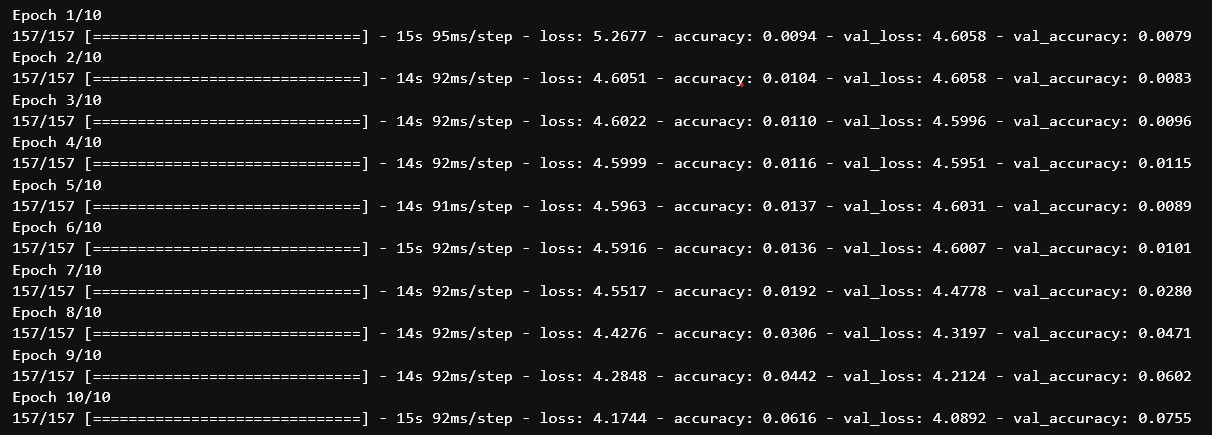

In [5]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 4.0878 - accuracy: 0.0795


[4.087798595428467, 0.0794999971985817]

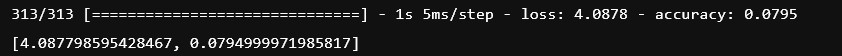

In [6]:
def predict_image(input_img):
    # Image needs to be resized to 32x32 since model input shape was previously set to 32x32,3 --> model.add( Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)) )!
    resized_img = resize(input_img,(32,32,3))

    # Show the image
    img = plt.imshow(input_img)

    #Test the model prediction capabilities for the first test image
    img_prediction = model.predict(np.array([resized_img]))

    #Sort the predictions from least to greatest
    list_index = np.arange(0,99)
    x = img_prediction

    for i in range(10):
        for j in range(10):
            if x[0][list_index[i]] > x[0][list_index[j]]:
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp

    #Print the five highest predictions
    for i in range(5):
        print(classification[list_index[i]], ":", round(img_prediction[0][list_index[i]] * 100, 2), "%")

In [7]:
classification = ["beaver", "dolphin", "otter", "seal", "whale", "aquarium",
 "fish", "flatfish", "ray", "shark", "trout", "orchids", "poppies", "roses", "sunflowers", 
 "tulips", "bottles", "bowls", "cans", "cups", "plates", "apples", "mushrooms", "oranges", 
 "pears", "sweet peppers", "clock", "computer keyboard", "lamp", "telephone", "television", 
 "bed", "chair", "couch", "table", "wardrobe", "bee", "beetle", "butterfly", "caterpillar", 
 "cockroach", "bear", "leopard", "lion", "tiger", "wolf", "bridge", "castle", "house", "road", 
 "skyscraper", "cloud", "forest", "mountain", "plain", "sea", "camel", "cattle", "chimpanzee", 
 "elephant", "kangaroo", "fox", "porcupine", "possum", "raccoon", "skunk", "crab", "lobster", "snail", "spider", "worm"]
classification.sort()

['apples',
 'aquarium',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bottles',
 'bowls',
 'bridge',
 'butterfly',
 'camel',
 'cans',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'computer keyboard',
 'couch',
 'crab',
 'cups',
 'dolphin',
 'elephant',
 'fish',
 'flatfish',
 'forest',
 'fox',
 'house',
 'kangaroo',
 'lamp',
 'leopard',
 'lion',
 'lobster',
 'mountain',
 'mushrooms',
 'oranges',
 'orchids',
 'otter',
 'pears',
 'plain',
 'plates',
 'poppies',
 'porcupine',
 'possum',
 'raccoon',
 'ray',
 'road',
 'roses',
 'sea',
 'seal',
 'shark',
 'skunk',
 'skyscraper',
 'snail',
 'spider',
 'sunflowers',
 'sweet peppers',
 'table',
 'telephone',
 'television',
 'tiger',
 'trout',
 'tulips',
 'wardrobe',
 'whale',
 'wolf',
 'worm']